# Projet 2 : COVID

## NOM : JIANG 
    
## Prénom : Tingyu

<br> 

## Masters, Parcours transitoire « Approche interdisciplinaire en sciences des données »

### UE D1 « Préparation et exploration des données »

### 2020-2021

<br>

**Instructeurs : Yves-André Chapuis, Xavier Dolques**

## 1.1. Objectif du projet

L'objectif de ce projet est de synthétiser l'**`Analyse Exploratoire des Données (AED)`** qui a été réalisée dans le Notebook intitulé **`Projet2_COVID.ipynb`** (à télécharger sur Moodle) sur les premiers mois 2020 de la pandémie du COVID-19. 

Qu'est qu'une **`AED`** ?

Plus connue sous la terminoligie en anglais *Exploratory Data Analysis* (*EDA*), l'**`AED`** est une approche d'analyse des ensembles de données pour résumer leurs principales caractéristiques, souvent à l'aide de graphiques statistiques et d'autres méthodes de visualisation des données.

Grace à plusieurs techniques de traitement, l'**`AED`** permet de :
    
- maximiser la visibilité sur un ensemble de données;
- découvrir la structure sous-jacente;
- extraire des variables importantes; 
- détecter les valeurs aberrantes et les anomalies;
- tester les hypothèses sous-jacentes;
- déterminer les paramètres de facteur optimaux.

## 1.2. Travail demandé

### 1.2.1. A faire

Après avoir analyser l'AED donné dans le Notebook **`Projet2_COVID.ipynb`**,pProposez une étude en particulier à partir des outils de visualisation abordés. Par exemple, comparer l'évolution de la pandémie entre la France et les US.

### 2.1.2. A remettre

- Remettre votre fichier Notebook avec le travail demandé avant la séance suivante, soit le **vendredi 7/5**.
- Intitulé votre fichier Notebook : **`Projet2_NOM_Prénom.ipynb`**
- Déposition le fichier Notebook sur Moddle dans le dossier **"COVID"**.

## 1.3. Évaluation

### 1.3.1. Compte-rendu

Une note moyenne de vos compte-rendus sera utilisée comme BONUS sur la note finale de Travaux Pratiques (TP) :
- (+2) : Excellent
- (+1) : Bien à Très Bien
- 0 : Neutre
- (-1) : Retard ou Faible
- (-2) : Pas de rendu

### 1.3.2. Examen TP

Un examen de Travaux Pratiques (TP) est prévu lors de la dernière séance. 
<br>
Cet examen sera basé sur les projets abordés.
<br>
A noter que les éléments de correction des projets seront fornis après chaque rendu.

# 2. Votre Analyse

Nous sommes dans un environnement incertain, qui se reflète également sur les marchés financiers. Vous rencontrerez de nombreuses questions, telles que comment COVID19 affectera les marchés financiers, dans quelle mesure le marché boursier baissera, quand et comment cela se terminera. Dans cet article, nous analyserons et tirerons des leçons des informations épidémiques passées pour répondre à ces questions et prédire le marché futur.

### La situation du marché financier pendant le covid-19

In [37]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

Il y a deux paramètres, le premier est le "^ GPSC" du S&P 500 dans Yahoo Finance, et le second est la date à partir de laquelle je veux obtenir des données. Le premier cas de coronavirus a été découvert le 17 novembre. Par conséquent, j'ai utilisé cette date ci.
<br>Puisque nous nous intéressons au changement de pourcentage quotidien, j'utiliserai la fonction pct_change () de Python pour calculer et le rapporter dans la colonne correspondante. Par exemple, si la variation du pourcentage quotidien passe de cent à cent vingt, la valeur de ces données sera 0,02.


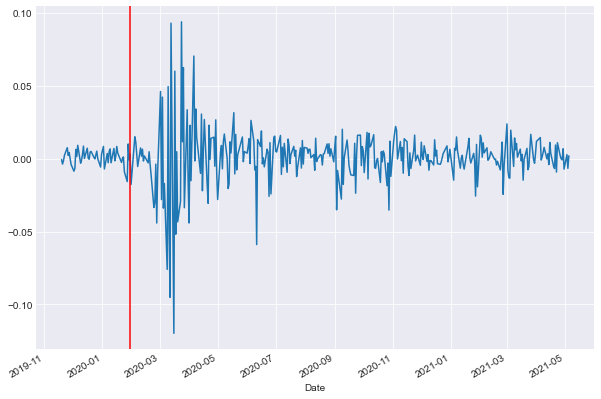

In [38]:
data_sp = pdr.get_data_yahoo('^GSPC', '17-Nov-19')

# Calculate the percentage change
data_pc = data_sp.Close.pct_change()

# Plot
data_pc.plot(figsize=(10, 7), grid=True)
plt.axvline('30-Jan-20',color='Red')
plt.show()


In [39]:
data

,^GSPC,CL=F,GC=F,TLT
Date,,,,
2009-03-16,753.890015,47.349998,921.599976,72.007088
2009-03-17,778.119995,49.160000,916.400024,71.615395
2009-03-18,794.349976,48.139999,888.700012,74.328766
2009-03-19,784.039978,51.610001,958.299988,74.421318
2009-03-20,768.539978,51.060001,955.799988,74.008255
...,...,...,...,...
2011-08-05,1199.380005,86.879997,1648.800049,80.360352
2011-08-08,1119.459961,81.309998,1710.199951,82.897148
2011-08-09,1172.530029,79.300003,1740.000000,83.148483


In [40]:
timelines = pd.read_csv('data/pandemics_timelines.csv').dropna()
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])
timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31
1,SARS,2002-11-16,2003-03-26,2003-03-26,2003-07-05
2,Swine Flu,2009-04-15,2009-04-25,2009-06-11,2010-08-11
3,Hong Kong Flu,1968-07-01,1968-09-30,1968-09-30,1970-12-31
4,Asian Flu,1957-02-28,1957-06-30,1957-06-30,1958-12-31
5,EBOLA,2013-12-01,2014-08-08,2014-08-08,2016-01-14
6,WWII,1939-09-01,1939-09-01,1939-09-01,1945-09-02


**S&P 500** : Le S&P 500 est un indice boursier basé sur 500 grandes sociétés cotées à la bourses aux États-Unis (NYSE ou NASDAQ).
<br>**TLT** :Les bons du Trésor américain à 20 ans sur le marché américain

Nous analyserons l'économie pandent l'épidémie sur la base des prix du S & P500, du pétrole brut, de l'or et du TLT. La ligne bleue est la date à laquelle le premier cas a été confirmé et la ligne rouge est la date à laquelle l'OMS a déclaré l'état d'urgencesanitaire de santé publique.

In [41]:
def get_data(tl):    
    inst_list = ['^GSPC', 'CL=F','GC=F', 'TLT']
    data = pd.DataFrame()
    for inst in inst_list:
        try:
            data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except Exception as e:
            print('No data available for ',inst, e)

    return data


# Get data during covid19 pandemic
covid_timelines = timelines.loc[timelines.pandemic_name=='covid19']
data = get_data(covid_timelines)
data.head()

,^GSPC,CL=F,GC=F,TLT
Date,,,,
2019-10-18,2986.199951,53.779999,1488.199951,136.134293
2019-10-21,3006.719971,53.310001,1482.400024,135.110168
2019-10-22,2995.989990,54.160000,1481.699951,135.900192
2019-10-23,3004.520020,55.970001,1489.900024,136.036728
2019-10-24,3010.290039,56.230000,1498.900024,135.763672


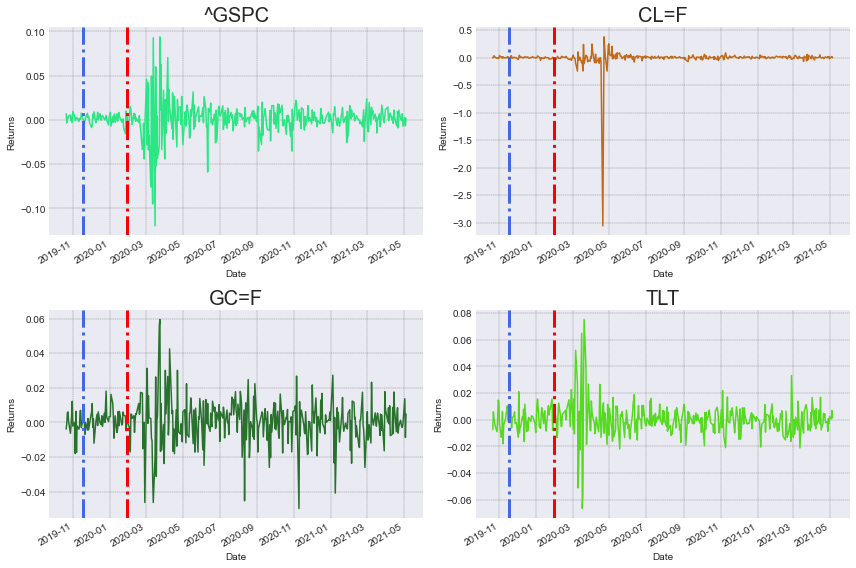

In [42]:
def plot_daily_pc(data, tl):
    data_pc = data.pct_change().dropna()
    fig = plt.figure(figsize=(12, 8))
    i = 0
    for col in data_pc.columns:
        # Add the subplot
        sub = fig.add_subplot(2, 2, i+1)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot
        r = random.random()
        b = random.random()
        g = random.random()
        data_pc[col].plot(color=(r, g, b))
        sub.set_ylabel('Returns')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='Red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()
    
plot_daily_pc(data, covid_timelines)

Nous pouvons voir que les variations quotidiennes du prix du S & P500 sont presque nulles au début, et nous pouvons voir que la volatilité a radicalement changé quelques jours après que l'OMS a déclaré l'état d'urgence. La plage de variation quotidienne est de 5% à 10%.
De plus, non seulement le S & P500 a varié, mais aussi le pétrole brut, l'or et notre TLT (c'est-à-dire les bons du Trésor à 20 ans sur le marché américain) peuvent également ressentir des caractéristiques de changements similaires. **Par conséquent, nous pouvons facilement conclure que le Coronavirus rend les marchés financiers instable.**


Une autre façon de regarder ces graphiques est de dire qu'il y a de nombreux indicateurs qui baissent, mais il y a aussi de nombreux indicateurs qui augmentent. Alors, j'ai tracé les avantages cumulatifs des quatre scénarios afin d'évaluer la tendance du marché.


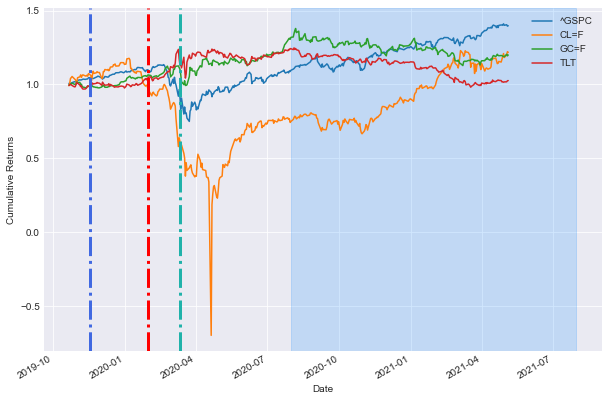

In [43]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()
    
plot_cumulative_returns(data, covid_timelines)

Comme nous pouvons le voir, la ligne jeune concerne le pétrole brut, qui semble être le plus touché. Par rapport au niveau le plus élevé, il a baissé de près de 60%. La ligne bleue représentant le S & P500 montre également une forte tendance à la baisse. Mais l'impact sur l'or n'est pas aussi bon que le S & P500 et le pétrole brut.

Cela signifie-t-il qu'en ces temps incertains, nous devrions éventuellement inclure l'or dans notre portefeuille d'investissement comme une transition raisonnable. Mais ne tirons pas de conclusions aussi rapidement. Nous en discuterons plus tard. Le dernier est les bons du Trésor américain, qui ont fortement chuté et qui s’est redressés lentement.

En même temps, nous allons dessiner un graphique de déclin. Il va s’agir d’une mesure du nombre de gouttes à partir du pic dans une période de temps donnée. Regardez maintenant le graphique.



In [44]:
def calc_drawdown(data, tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    cum_rets = data_cum_ret.loc[tl.first_case.iloc[0]:tl.last_date.iloc[0]]
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


def plot_drawdown(drawdown, tl):
    fig = plt.figure(figsize=(12, 8))
    i = 0
    for col in drawdown.columns:
        # Add the subplot
        sub = fig.add_subplot(2, 2, i+1)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot

        drawdown[col].plot(color='r')
        sub.set_ylabel('Returns')
        sub.fill_between(drawdown.index, drawdown[col], color='red')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()

^GSPC    -33.924960
CL=F    -159.475266
GC=F     -11.776647
TLT      -15.727695
dtype: float64


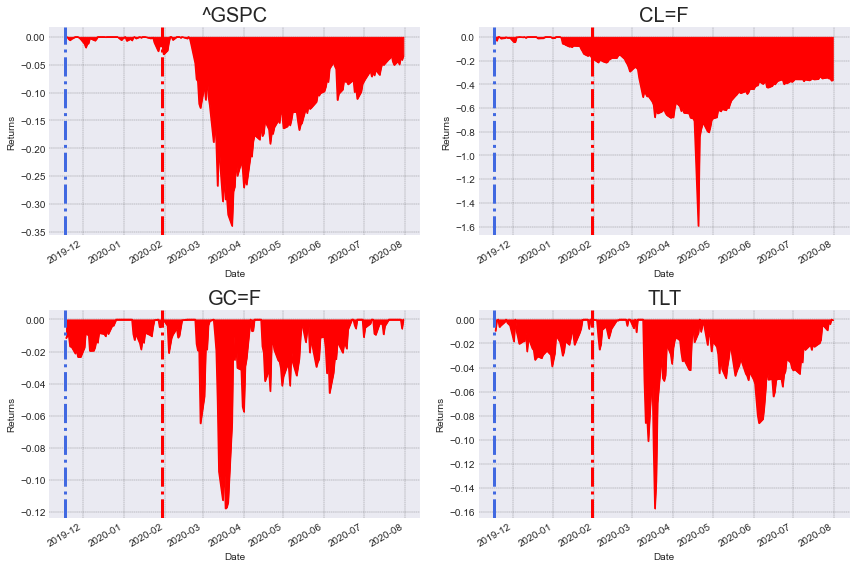

In [45]:
#data.columns = ['SP500','Crude Oil', 'Gold', 'TLT']
drawdown = calc_drawdown(data,covid_timelines)
# Find the maximum drawdowns
print(drawdown.min()*100)
#plt.style.use('seaborn-darkgrid')
plot_drawdown(drawdown,covid_timelines)

On peut voir que le prix du pétrole brut a chuté à plusieurs reprises, le maximum étant presque 160%, il a subi de grands changements. Le prix de l'or a aussi beaucoup chuté. Dans le graphique S & P500, il y a eu un pic vers février, puis il a chuté de près de 33%. L'impact majeur de l'épidémie sur les marchés financiers est à nouveau vérifié.

Les pourcentage qui chute le plus sont les suivant:
<br>SP500    -33.924960
<br>le pétole    -159.475266
<br>l'or     -11.776647
<br>TLT      -15.727713

Bien que les pertes puissent nous aider à comprendre dans quelle mesure les classes d'actifs peuvent baisser, ce sont toujours des classes d'actifs différents. Il faut donc les comparer, avec d'autres termes, afin de montrer une relation entre eux.

Pour répondre à cette question, nous allons créer un nuage de points. Les nuages de points peuvent nous aider à comprendre la relation entre différentes données.


Correlation           ^GSPC      CL=F      GC=F       TLT
^GSPC  1.000000  0.156182  0.162530 -0.428542
CL=F   0.156182  1.000000  0.023931 -0.074218
GC=F   0.162530  0.023931  1.000000  0.158158
TLT   -0.428542 -0.074218  0.158158  1.000000


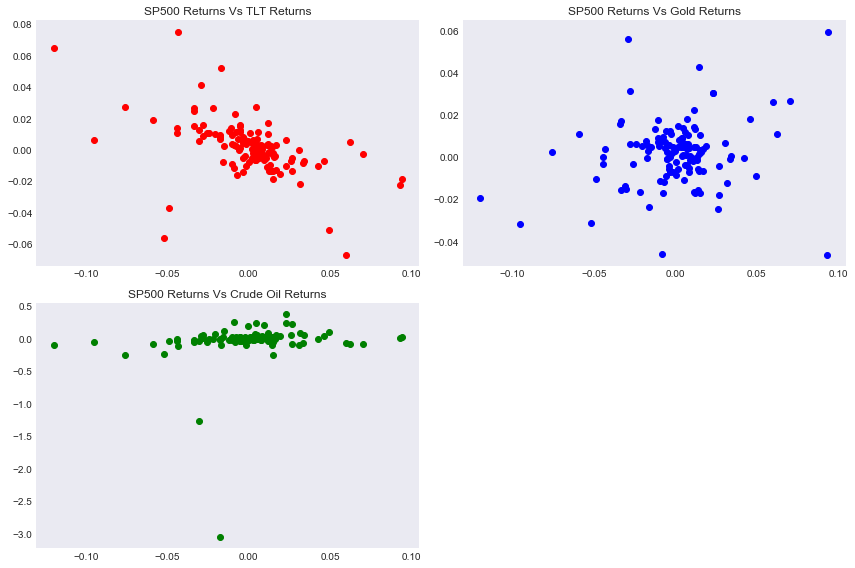

In [46]:
def plot_scatter(data, tl):
    data_pc = data.pct_change().dropna()
    temp = data_pc.loc[tl.who_emergency.iloc[0]:tl.last_date.iloc[0]]

    fig = plt.figure(figsize=(12, 8))

    sub = fig.add_subplot(2, 2, 1)
    sub.scatter(temp['^GSPC'],temp['TLT'],color='red')
    sub.set_title('SP500 Returns Vs TLT Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 2)
    sub.scatter(temp['^GSPC'],temp['GC=F'],color='blue')
    sub.set_title('SP500 Returns Vs Gold Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 3)
    sub.scatter(temp['^GSPC'],temp['CL=F'],color='green')
    sub.set_title('SP500 Returns Vs Crude Oil Returns')
    sub.grid()
    
    # Correlation
    sum_corr = data_pc[data_pc.columns].corr()
    print('Correlation',sum_corr)


    plt.tight_layout()
    plt.show()
    
plot_scatter(data,covid_timelines)

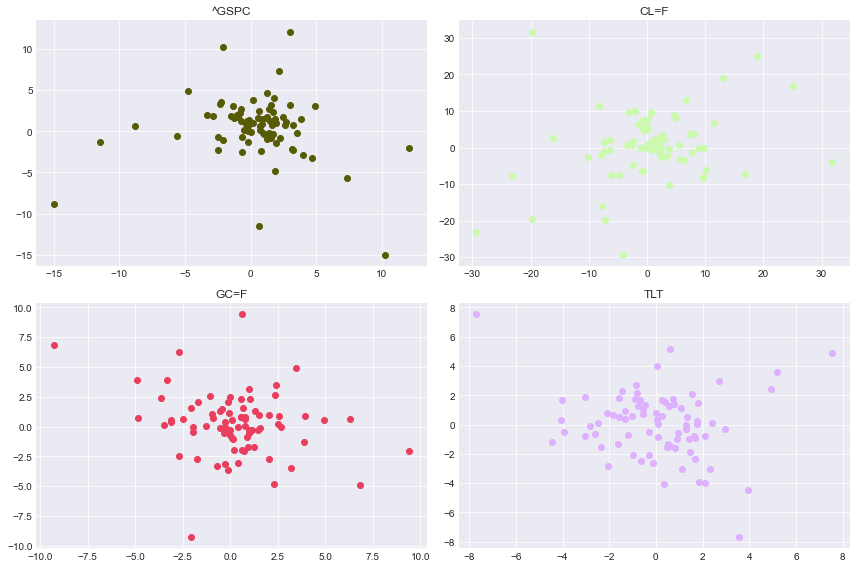

In [47]:
def plot_auto_correlation(data, tl):
    data_pc = data.resample('W').ffill().pct_change()*100
    fig = plt.figure(figsize=(12, 8))
    i=1
    for col in data_pc.columns:        
        sub = fig.add_subplot(2, 2, i)
        i=i+1
        r = random.random()
        b = random.random()
        g = random.random()        
        sub.scatter(data_pc.loc[:,col],data_pc.shift(1).loc[:,col],color=(r,g,b))
        sub.set_title(col)
    plt.tight_layout()
    plt.show()
    
plot_auto_correlation(data,covid_timelines)

Le nuage de points rouge est TLT et S & P500, on observe une corrélation négative. Nous savons tous qu'en temps de crise, l'économie ralentit et que la réserve fédérale et d'autres agences gouvernementales interviennent, entraînant une baisse des taux. En raison de la relation inverse entre le taux et le prix, une diminution du taux entraînera une augmentation du prix. Par conséquent, nous voyons une relation entre S & P500 et TLT. Cependant, nous n'avons que quelques points de données, il n'est donc pas judicieux de tirer une conclusion ici.

Jusqu'à présent, nous ne discutons que de l'ensemble du S & P500. Mais qu'en est-il des différents secteurs qui composent l’indice ? Pour les observer, j'ai créé un graphique dans lequel les principaux domaines du marché sont représentés.

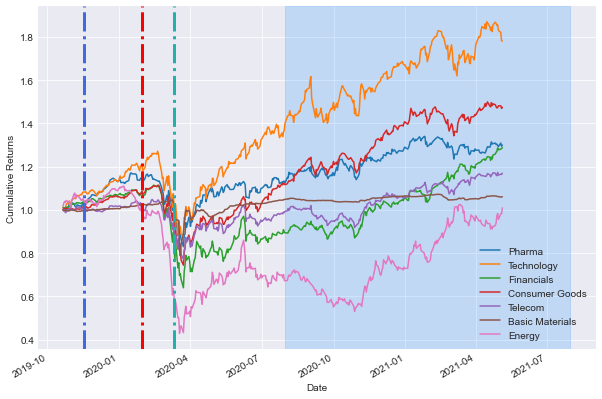

In [48]:
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except:
            pass

    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)

In [49]:
def calc_returns(data,first_date):
    returns = pd.DataFrame(index=data.columns)
    data = data.loc[first_date:]
    try:
        returns['one_month'] = (data.iloc[22]/data.iloc[0]-1)*100
        returns['three_months'] = (data.iloc[63]/data.iloc[0]-1)*100
        returns['six_months'] = (data.iloc[126]/data.iloc[0]-1)*100
        returns['one_year'] = (data.iloc[252]/data.iloc[0]-1)*100        
    except:
        pass
    returns.plot.bar(figsize=(10,7))
    plt.ylabel('Returns')
    plt.title('Returns from '+str(first_date))
    plt.grid()
    plt.show()
    return returns

Nous pouvons voir que les produits pharmaceutiques et la technologie sont deux domaines relativement moins touchés. Dans l'image ci-dessus, Technologie est la ligne orange, nous pouvons la voir en haut, puis Pharmaceutique est représenté par la ligne bleue. En général, tous les secteurs sont dans la même direction, mais la taille relative ou le degré de déclin est différent. Comme je l'ai déjà dit, l'impact sur les produits pharmaceutiques et la technologie est relativement faible.

Vous verrez une ligne rose indiquant les plus touchés. Considérant que nous avons vu précédemment que le pétrole brut est le plus touché, cela est logique car le pétrole brut est directement lié à l'énergie et a donc un impact sur l'industrie énergétique. Une autre observation est la ligne verte, qui indique que la situation financière a également diminué. La raison de cette situation est que chaque fois que l'économie ralentit, un grand nombre de défauts de paiement se produit, ce qui entraîne une augmentation des actifs non performants des banques et par conséquent, endommagera leurs profits et leurs pertes. L'augmentation des actifs non performants rend difficile la survie des banques. Sur le marché indien, l'exemple classique est Yes Bank. Par conséquent, lors de cette crise économique, c'est le secteur financier qui est le plus touché.

### La situation du marché financier pendant les pandémie precedents

### ex1 SARS

Le SRAS a des points communs : il a éclaté dans le sud de la Chine en 2002. Nous avons utilisé des mesures telles que l'isolement et la recherche des contacts pour le contrôler dans une petite zone.

Au cours de cette pandémie, environ 8 500 personnes ont été infectées. Actuellement, il n'y a pas de vaccin contre ce virus, mais nous avons pu contrôler cette situation grâce à l'évacuation sociale, et le nombre de nouvelles infections s'est stabilisé, de sorte que le nombre de décès a finalement diminué. Cependant, bien que les personnes infectées par le SRAS puissent être facilement identifiées, la détection des porteurs de coronavirus est plus compliquée. Néanmoins, nous pouvons toujours l'utiliser comme référence pour comprendre l'impact du coronavirus sur l'industrie.

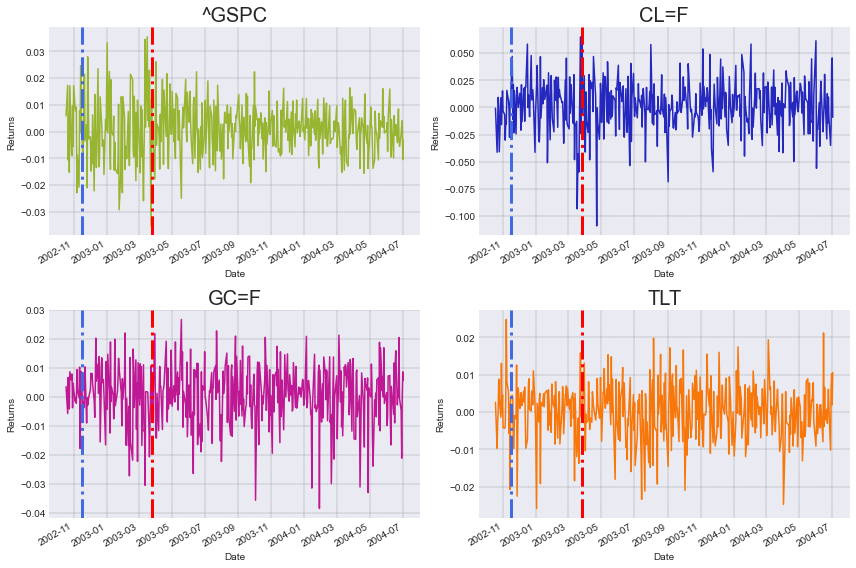

In [50]:
covid_timelines = timelines.loc[timelines.pandemic_name=='SARS']
data = get_data(covid_timelines)
data.head()

plot_daily_pc(data, covid_timelines)

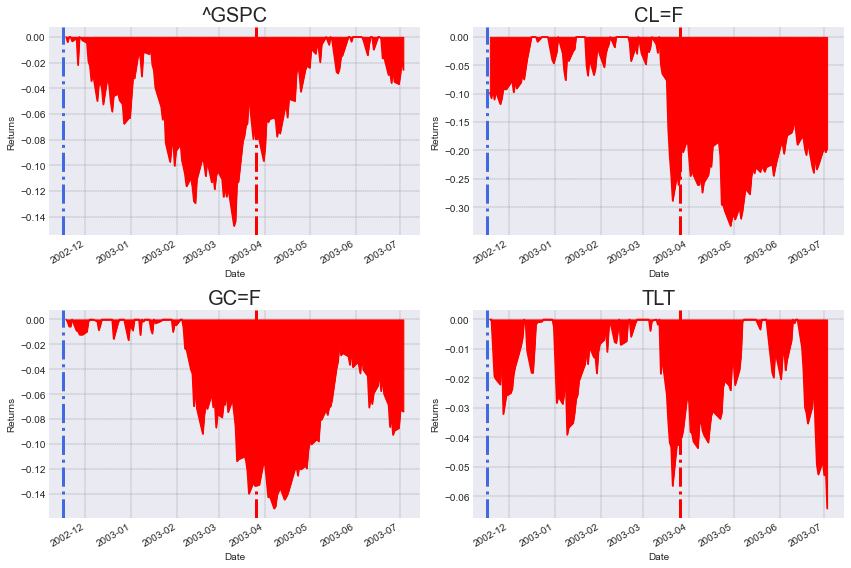

In [51]:
drawdown = calc_drawdown(data,covid_timelines)
plot_drawdown(drawdown,covid_timelines)

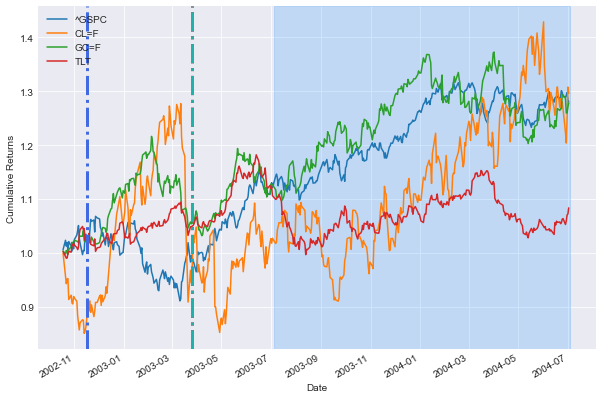

In [52]:
plot_cumulative_returns(data, covid_timelines)

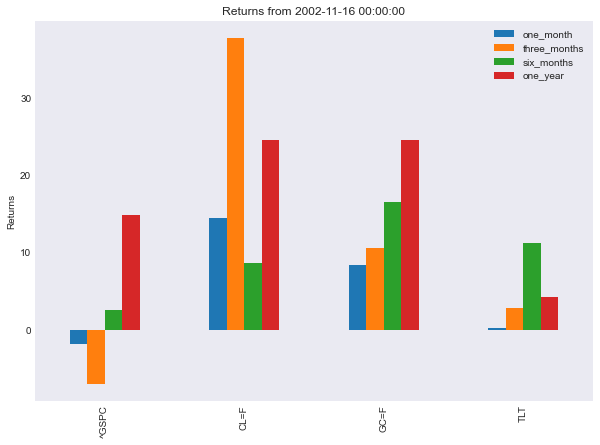

In [53]:
first_case_date = covid_timelines.first_case.iloc[0]
r = calc_returns(data,first_case_date)

Correlation           ^GSPC      CL=F      GC=F       TLT
^GSPC  1.000000 -0.182918 -0.200762 -0.325463
CL=F  -0.182918  1.000000  0.198779  0.084945
GC=F  -0.200762  0.198779  1.000000  0.230885
TLT   -0.325463  0.084945  0.230885  1.000000


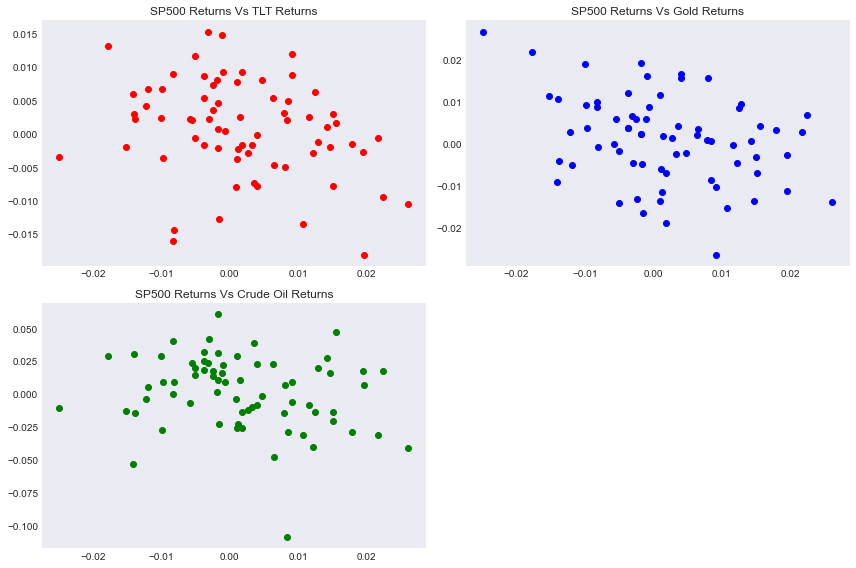

In [54]:
plot_scatter(data,covid_timelines)

Nous utiliserons les mêmes variations quotidiennes de pourcentage des quatre types de données. Qui sont pour rappel, pétrole brut, SP500, or et bons du Trésor américain à 20 ans. Comme il s'agit presque d'une maladie endémique dans une zone distincte, nous pensons qu'elle aura moins d'impact sur nos marchés financiers, mais la ligne rouge indique quand il s'agit d'une éventuelle urgence sanitaire. On constate de forte variation dans les deux sens.
Au cours de cette période, les prix du pétrole brut ont fortement chuté, mais par rapport à la période du coronavirus, le S & P500 a été relativement moins touché. Ceci est également vrai pour l'or et le TLT.

### ex2 Swine Flu

In [55]:
covid_timelines = timelines.loc[timelines.pandemic_name=='Swine Flu']
data = get_data(covid_timelines)
data.head()

,^GSPC,CL=F,GC=F,TLT
Date,,,,
2009-03-16,753.890015,47.349998,921.599976,72.007088
2009-03-17,778.119995,49.160000,916.400024,71.615395
2009-03-18,794.349976,48.139999,888.700012,74.328766
2009-03-19,784.039978,51.610001,958.299988,74.421318
2009-03-20,768.539978,51.060001,955.799988,74.008255


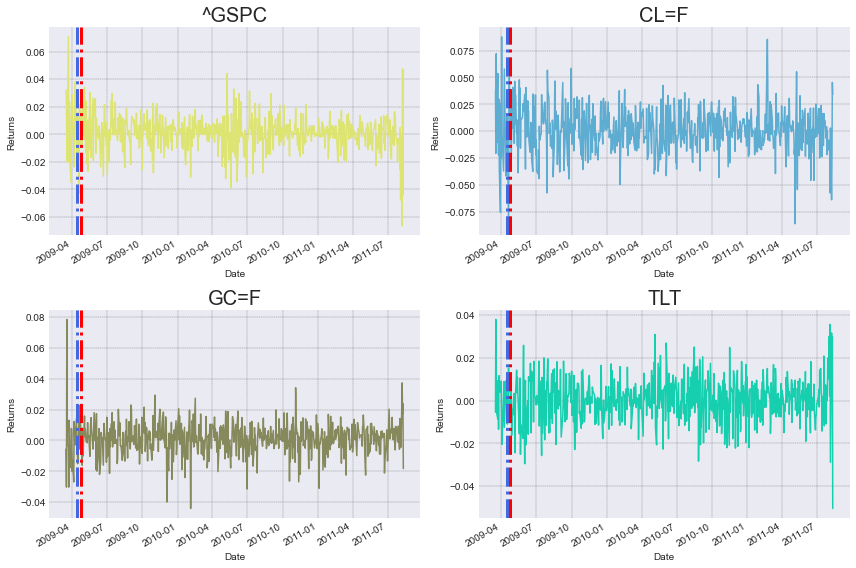

In [56]:
plot_daily_pc(data, covid_timelines)

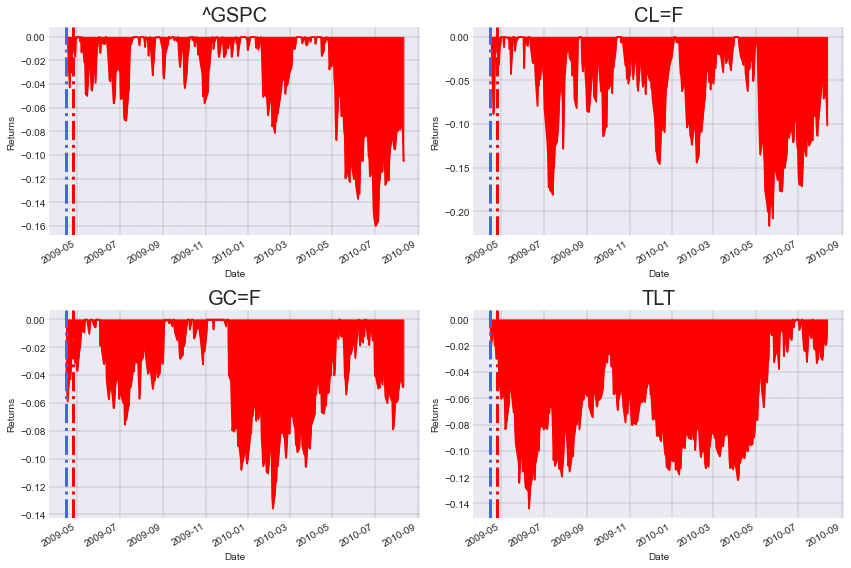

In [57]:
drawdown = calc_drawdown(data,covid_timelines)
plot_drawdown(drawdown,covid_timelines)

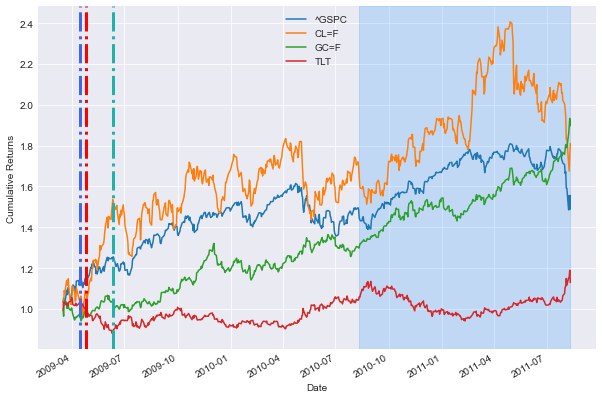

In [58]:
plot_cumulative_returns(data, covid_timelines)

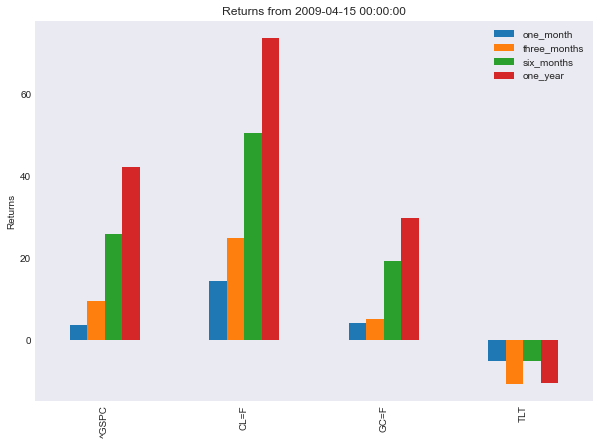

In [59]:
first_case_date = covid_timelines.first_case.iloc[0]
r = calc_returns(data,first_case_date)

Correlation           ^GSPC      CL=F      GC=F       TLT
^GSPC  1.000000  0.522562  0.090348 -0.455661
CL=F   0.522562  1.000000  0.334871 -0.292566
GC=F   0.090348  0.334871  1.000000  0.015624
TLT   -0.455661 -0.292566  0.015624  1.000000


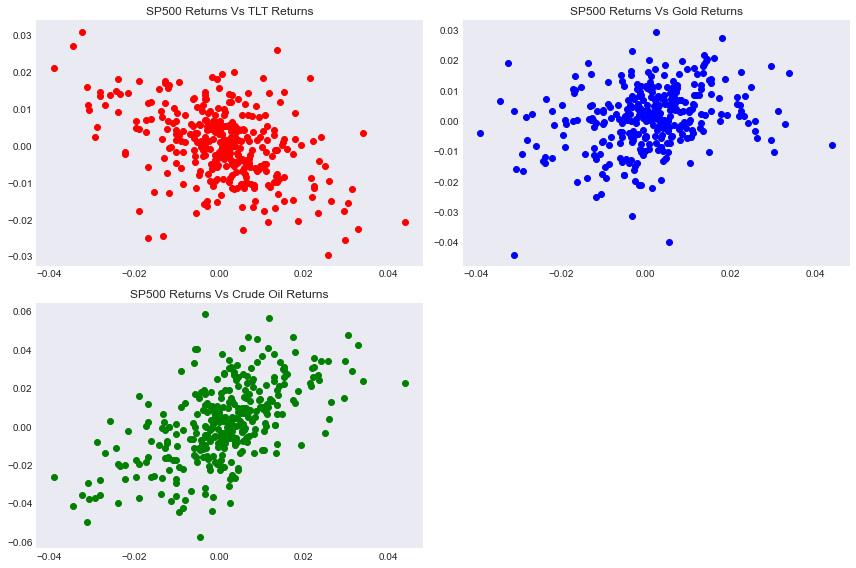

In [60]:
plot_scatter(data,covid_timelines)

Pendant l'épidémie, le SP500 a chuté de 6%. Le pétrole brut a chuté d'environ 18%, l'or a chuté d'environ 7% et le TLT a chuté de 13%. Cependant, ces fluctuations se sont produites ici, et bien que cela n'ait pas été initialement considéré comme un choc grave, il a commencé à se propager aux États-Unis. Par conséquent, nous constatons que nos données ont beaucoup baissé non pas lorsque l'épidémie a été annoncée, mais lors d’un moment donné.

À la fin de l'épidémie, le marché a tenté de rattraper son retard et est entré dans une phase haussière, qui semblait très normal. Nous pouvons afficher les revenus sous forme de barres pour souligner davantage les caractéristiques des données. Il est intéressant de noter que contrairement à la situation précédente, le secteur financier ici a relativement bien performé et se situe au plus haut niveau. La raison est que le monde est tombé chaque année en récession économique en raison de l'épidémie de grippe porcine, entraînant un grand nombre de liquidations et entraînant une sous-évaluation des marchés financiers. Il en va de même pour les valeurs technologiques.

Ici, on peut voir qu'il existe une relation claire entre les actifs. Par exemple, S & P500 et TLT sont négativement corrélés, ce qui signifie que si TLT augmente, S & P500 baissera. La relation avec l'or n'est pas claire, nous ne pouvons donc pas être sûrs que l'or est une valeur refuge. Pour le pétrole brut, nous avons constaté qu'il existe une corrélation positive entre les deux, ce qui signifie que si le S & P500 baisse, le pétrole brut chutera également. Dans l'ensemble, le S & P500 est positivement corrélé avec le pétrole brut, négativement corrélé avec le TLT et n'a pas de corrélation avec l'or.
Le secteur de l'énergie a été gravement touché pendant l'épidémie, mais s'est fortement redressé après l'amélioration de la situation. Ceci est similaire au rebond du pétrole brut que nous avons vu plus tôt.

### Conseil

Si vous envisagez votre propre portefeuille, TLT a du sens car il est négativement corrélé avec S & P500. Vous devriez éviter d'utiliser du pétrole brut car la demande de pétrole brut pourrait faiblir en raison de la crise actuelle.

Pendant la crise financière liée à l'épidémie, ajouter de l'or au portefeuille d'investissement peut être une option, il est important de prendre en compte l'évolution de l'épidémie.

Les entreprises technologiques et pharmaceutiques sont moins touchées par l'épidémie, cependant les portefeuilles d'investissement doivent également prêter attention au partage des risques.  Donc, tout choix d'investissement ne doit pas seulement être limité par le secteur d'activité, il faut également prêter attention à la situation commerciale de l'entreprise.

# end